In [1]:
# This library is used for structured data operations, like import CSV files, create data frames, and data preparation
import pandas as pd
#This is a mathematical library. Has a powerful N-dimensional array object, linear algebra, Fourier transform, etc.
import numpy as np
#This library is used for visualization of data.
import matplotlib.pyplot as plt
#The Simple Imputer class from sklearn.impute is a useful tool for handling missing values in datasets.
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
#This library os used for statistical graphics. It builds on top of matplotlib and integrates closely with pandas DS
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category = DeprecationWarning)

In [2]:
file_path = '/kaggle/input/british-airways-reviews/british_airways_reviews.csv'  # Update this with the correct file path
df = pd.read_csv(file_path)

In [3]:

# Set the display options to show more rows and columns
pd.set_option('display.max_columns', None)  # No column limit
pd.set_option('display.max_rows', None)  # No row limit
pd.set_option('display.max_seq_item', None)  # No item truncation for sequences (like lists)

print("Missing values in data frame:\n", df.isnull().sum())
print("shape of  Actual data")
print(df.shape)

df= df.dropna(subset=['Route', 'Date Flown','Type of Traveller','Seat Type','Trip Status'])

print("shape of data after applying dropna")
print(df.shape)

print("Missing values before imputation:\n", df.isnull().sum())

# Define columns that need imputation for ratings
columns_to_impute = ['Seat Comfort Rating', 'Staff Service Rating', 'Food & Beverages Rating',
                     'Inflight Entertainment Rating', 'Ground Service Rating']

# Initialize SimpleImputer with the most frequent strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Group by 'type_of_traveller' and apply imputation to each group
for traveller_type in df['Type of Traveller'].unique():
    # Select rows for the current traveller type
    subset = df[df['Type of Traveller'] == traveller_type]

    # Apply the imputer only to this subset
    df.loc[df['Type of Traveller'] == traveller_type, columns_to_impute] = imputer.fit_transform(
        subset[columns_to_impute])

print("Missing values after imputation:\n", df.isnull().sum())


Missing values in data frame:
 User Name                           0
Overall Rating                      5
Review                              0
Trip Status                      1523
Detail Review                       0
Type of Traveller                 771
Seat Type                           2
Route                             776
Date Flown                        778
Seat Comfort Rating               127
Staff Service Rating              142
Food & Beverages Rating           438
Inflight Entertainment Rating    1241
Ground Service Rating             850
Value For Money Rating              0
Recommended                         0
dtype: int64
shape of  Actual data
(3920, 16)
shape of data after applying dropna
(2389, 16)
Missing values before imputation:
 User Name                          0
Overall Rating                     0
Review                             0
Trip Status                        0
Detail Review                      0
Type of Traveller                  0
Seat Type  

Rating Percentage Over all                                        1          2          3          4  \
Seat Comfort Rating            28.631226  17.287568  24.947677   18.08288   
Staff Service Rating           23.943072  13.604018    16.9527  18.041021   
Food & Beverages Rating        47.718711  13.938887   14.69234  13.394726   
Inflight Entertainment Rating  59.564671    9.87861  13.227292  10.087903   
Ground Service Rating          36.542486  12.306404  17.999163  19.589787   
Value For Money Rating          40.10046  17.120134  16.492256  14.859774   

                                       5  
Seat Comfort Rating            11.050649  
Staff Service Rating           27.459188  
Food & Beverages Rating        10.255337  
Inflight Entertainment Rating   7.241524  
Ground Service Rating           13.56216  
Value For Money Rating         11.427375  


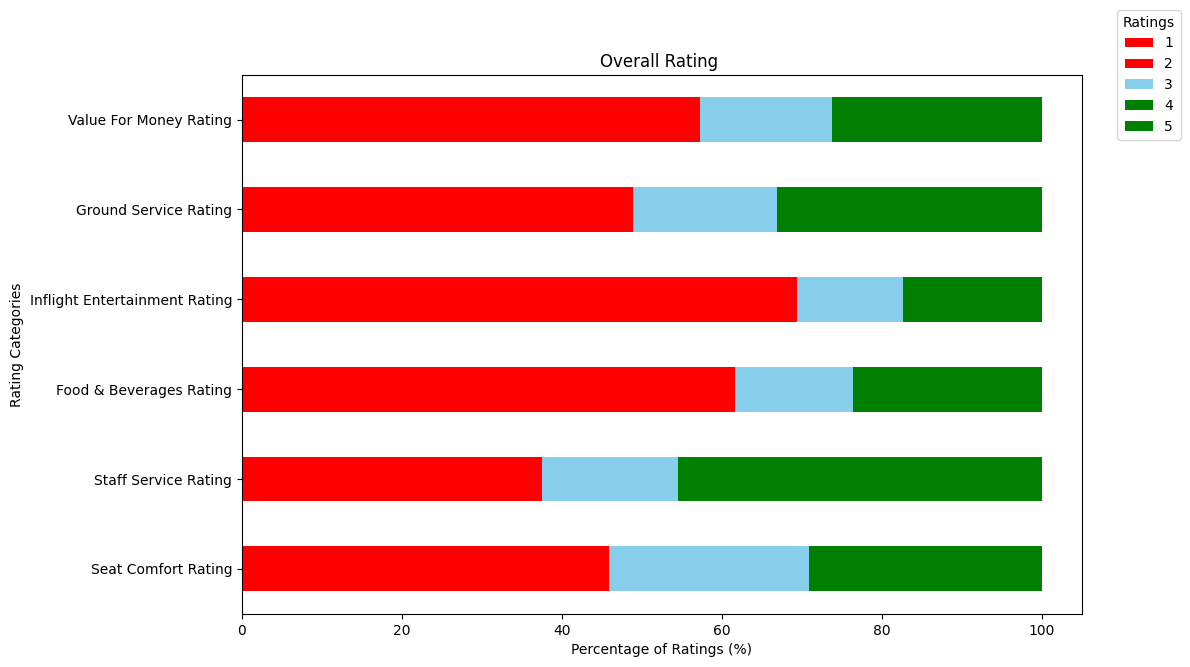

In [4]:
# 1. Over all Star Rating of Service and based on Seat type
ratings_columns = ['Seat Comfort Rating', 'Staff Service Rating', 'Food & Beverages Rating',
                   'Inflight Entertainment Rating', 'Ground Service Rating', 'Value For Money Rating']
# Prepare a DataFrame for value counts
rating_counts = pd.DataFrame(index=ratings_columns, columns=[1, 2, 3, 4, 5])

# Count the occurrences of each rating (1 to 5) for each column
for col in ratings_columns:
    rating_counts.loc[col] = df[col].value_counts().sort_index()

# Convert counts to percentages
rating_counts_percentage = rating_counts.div(rating_counts.sum(axis=1), axis=0) * 100
print("Rating Percentage Over all",rating_counts_percentage)

# Create the stacked bar chart with space on the left
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the stacked bar chart (with percentages)
rating_counts_percentage.plot(kind='barh', stacked=True, ax=ax, color=['red', 'red', 'skyblue', 'green', 'green'])

# Add labels and title
ax.set_xlabel('Percentage of Ratings (%)')
ax.set_ylabel('Rating Categories')
ax.set_title('Overall Rating ')

# Adjust layout to create space on the left for labels
plt.subplots_adjust(left=0.2)
ax.legend(title="Ratings", loc='center', bbox_to_anchor=(1.08, 1))

# Display the plot
plt.show()




Percentage Distribution for Seat Type: Premium Economy
                                       1          2          3          4  \
Seat Comfort Rating            24.336283  15.486726  24.336283  19.911504   
Staff Service Rating           23.008850  14.601770  15.486726  20.796460   
Food & Beverages Rating        40.265487  18.584071  17.699115  15.044248   
Inflight Entertainment Rating  36.725664  15.044248  22.566372  14.601770   
Ground Service Rating          32.300885  11.504425  16.814159  23.893805   
Value For Money Rating         38.938053  18.141593  15.486726  15.044248   

                                       5  
Seat Comfort Rating            15.929204  
Staff Service Rating           26.106195  
Food & Beverages Rating         8.407080  
Inflight Entertainment Rating  11.061947  
Ground Service Rating          15.486726  
Value For Money Rating         12.389381  

--------------------------------------------------



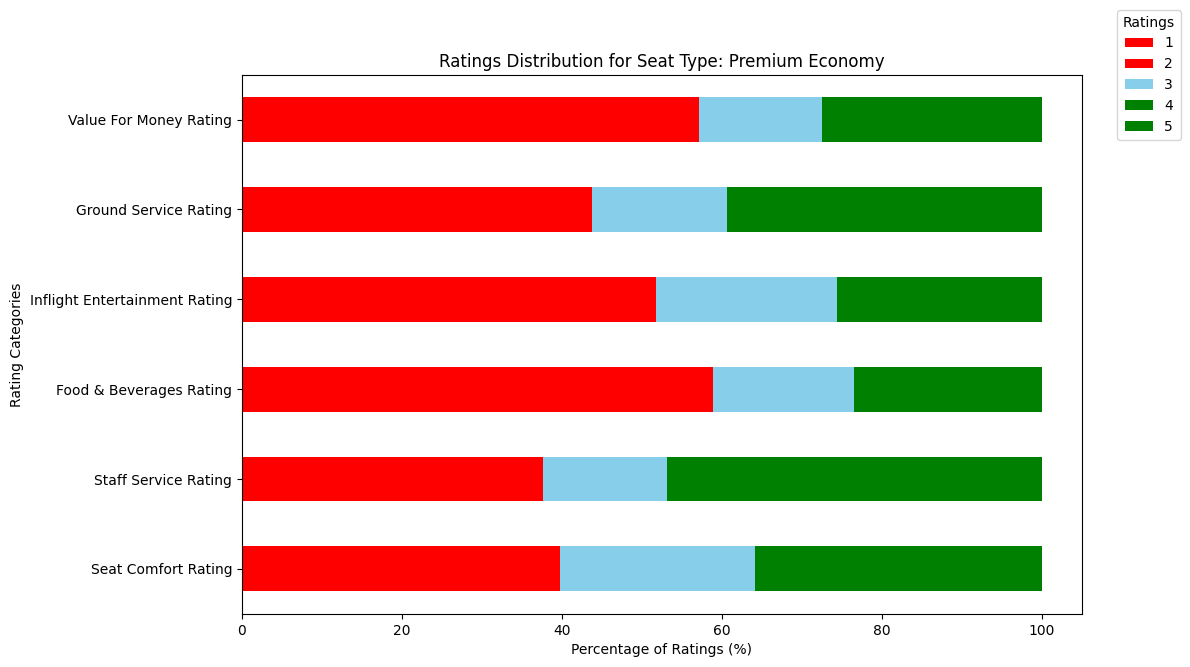

Percentage Distribution for Seat Type: Business Class
                                       1          2          3          4  \
Seat Comfort Rating            28.146143  16.373478  22.327470  21.786198   
Staff Service Rating           20.974290  11.637348  17.456022  20.162382   
Food & Beverages Rating        32.476319  15.426252  18.673884  18.673884   
Inflight Entertainment Rating  58.457375   9.878214  12.584574  11.231394   
Ground Service Rating          29.499323  12.313938  22.462788  22.056834   
Value For Money Rating         36.671177  15.155616  17.861976  18.538566   

                                       5  
Seat Comfort Rating            11.366712  
Staff Service Rating           29.769959  
Food & Beverages Rating        14.749662  
Inflight Entertainment Rating   7.848444  
Ground Service Rating          13.667118  
Value For Money Rating         11.772666  

--------------------------------------------------



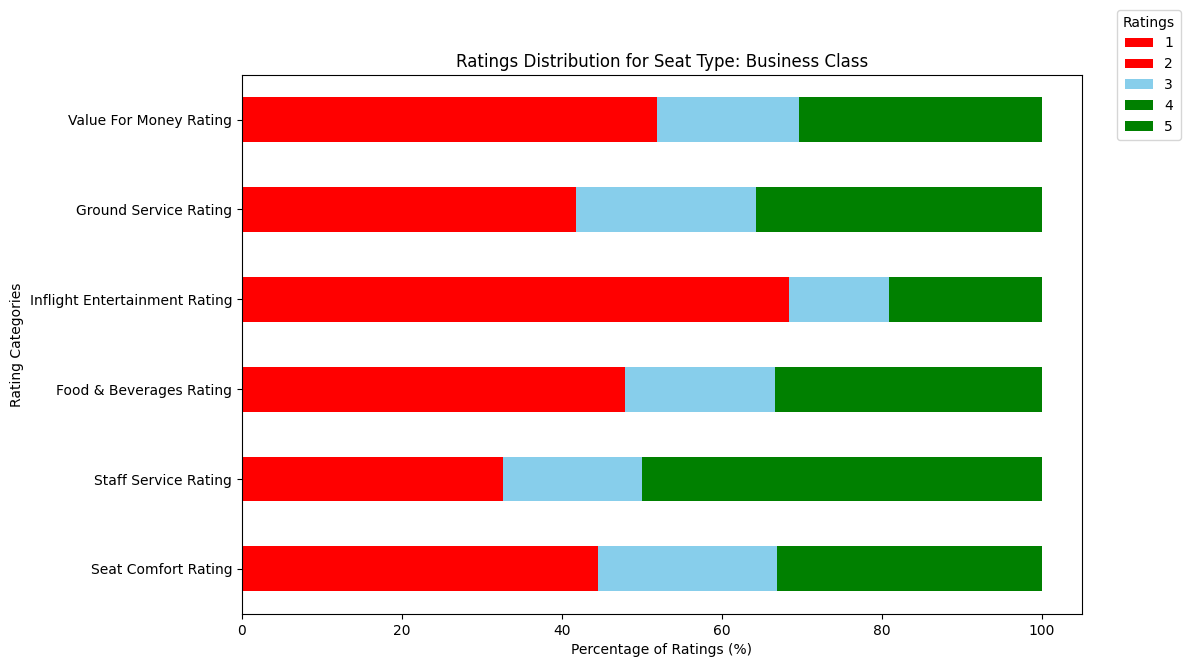

Percentage Distribution for Seat Type: Economy Class
                                       1          2          3          4  \
Seat Comfort Rating            31.065760  18.518519  26.832955  14.663643   
Staff Service Rating           26.530612  14.739229  17.838246  15.721844   
Food & Beverages Rating        59.108088  12.244898  12.018141   9.448224   
Inflight Entertainment Rating  66.893424   8.616780  10.582011   8.012094   
Ground Service Rating          42.630385  12.320484  15.570673  16.931217   
Value For Money Rating         42.932729  18.216175  16.250945  12.169312   

                                       5  
Seat Comfort Rating             8.919123  
Staff Service Rating           25.170068  
Food & Beverages Rating         7.180650  
Inflight Entertainment Rating   5.895692  
Ground Service Rating          12.547241  
Value For Money Rating         10.430839  

--------------------------------------------------



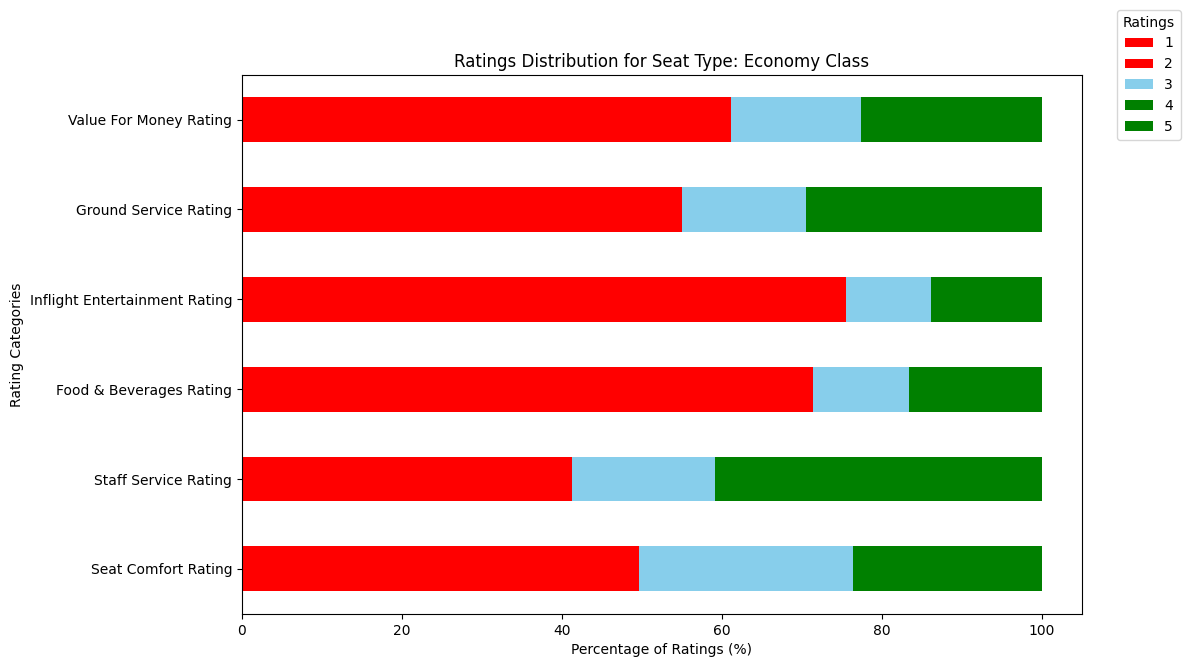

Percentage Distribution for Seat Type: First Class
                                       1          2          3          4  \
Seat Comfort Rating             9.900990  11.881188  20.792079  31.683168   
Staff Service Rating           13.861386  10.891089   4.950495  26.732673   
Food & Beverages Rating        26.732673  14.851485  13.861386  22.772277   
Inflight Entertainment Rating  22.772277  14.851485  31.683168  18.811881   
Ground Service Rating          17.821782  13.861386  19.801980  26.732673   
Value For Money Rating         30.693069  14.851485  11.881188  22.772277   

                                       5  
Seat Comfort Rating            25.742574  
Staff Service Rating           43.564356  
Food & Beverages Rating        21.782178  
Inflight Entertainment Rating  11.881188  
Ground Service Rating          21.782178  
Value For Money Rating         19.801980  

--------------------------------------------------



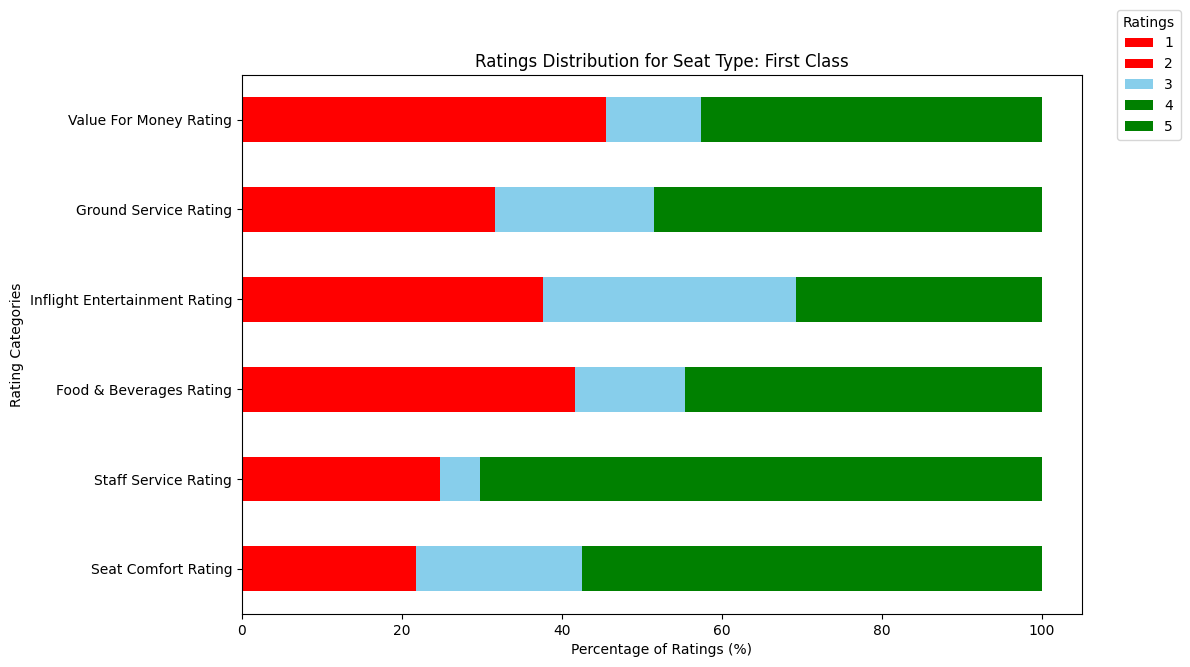

In [5]:
# Loop over each Seat Type to plot separate graphs
for seat_type in df['Seat Type'].unique():
    # Prepare a DataFrame for value counts for each seat type
    rating_counts_seat_type = pd.DataFrame(index=ratings_columns, columns=[1, 2, 3, 4, 5]).fillna(0)

    # Count the occurrences of each rating (1 to 5) for each column, filtered by the Seat Type
    for col in ratings_columns:
        rating_counts_seat_type.loc[col] = df[df['Seat Type'] == seat_type][col].value_counts().sort_index()

    # Convert counts to percentages
    rating_counts_percentage = rating_counts_seat_type.div(rating_counts_seat_type.sum(axis=1), axis=0) * 100
    # Print the percentage values for each seat type and rating category
    print(f"Percentage Distribution for Seat Type: {seat_type}")
    print(rating_counts_percentage)
    print("\n" + "-" * 50 + "\n")  #

    # Create the stacked bar chart for the current seat type
    fig, ax = plt.subplots(figsize=(12, 7))

    # Plot the stacked bar chart (with percentages)
    rating_counts_percentage.plot(kind='barh', stacked=True, ax=ax, color=['red', 'red', 'skyblue', 'green', 'green'])

    # Add labels and title
    ax.set_xlabel('Percentage of Ratings (%)')
    ax.set_ylabel('Rating Categories')
    ax.set_title(f'Ratings Distribution for Seat Type: {seat_type}')

    # Adjust layout to create space on the left for labels
    plt.subplots_adjust(left=0.2)

    # Add legend outside for better clarity
    ax.legend(title="Ratings", loc='center', bbox_to_anchor=(1.08, 1))

    # Display the plot
    plt.show()


Seat Type          Business Class  Economy Class  First Class  Premium Economy
Type of Traveller                                                             
Business                      233            227           21               47
Couple Leisure                277            394           38               68
Family Leisure                 77            223           10               24
Solo Leisure                  152            479           32               87


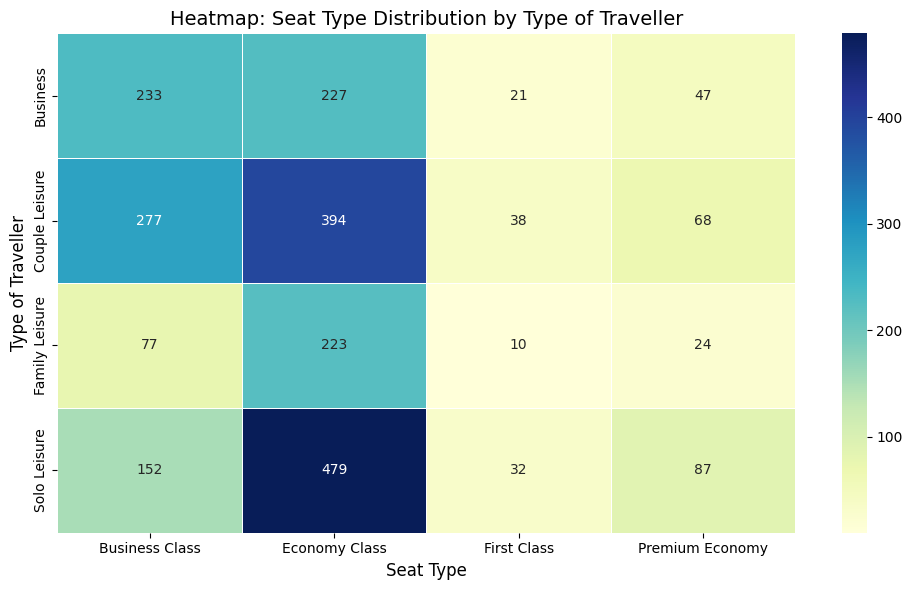

In [6]:
# 2. Heatmap for Type of Traveller and Seat type obtained by traveller

# Count the occurrences of each combination of traveller type and seat type
seat_counts = pd.crosstab(df["Type of Traveller"], df["Seat Type"])
print(seat_counts)
# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(seat_counts, annot=True, fmt="d", cmap="YlGnBu", cbar=True, linewidths=0.5)

# Customize the plot
plt.title("Heatmap: Seat Type Distribution by Type of Traveller", fontsize=14)
plt.xlabel("Seat Type", fontsize=12)
plt.ylabel("Type of Traveller", fontsize=12)

# Show the plot
plt.tight_layout()
# plt.show()

Overall Recommendation Analysis:
Recommended
no     1628
yes     761
Name: count, dtype: int64


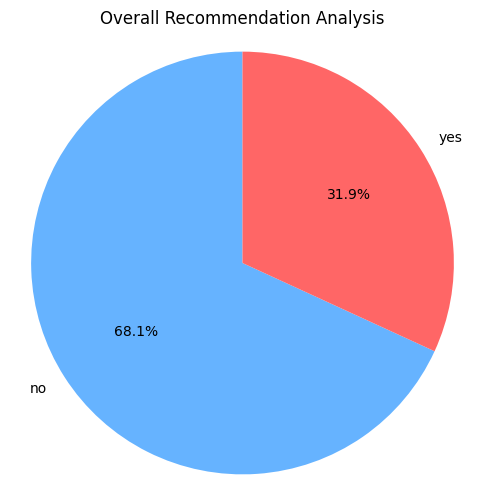

In [7]:
# 3.Pie chart for Recommendation by type of traveller
# Count the occurrences of 'yes' and 'no' for overall recommendation
count_values = df['Recommended'].value_counts()

# Print the overall recommendation analysis
print("Overall Recommendation Analysis:")
print(count_values)

# Group by 'Type of Traveller' and 'Recommended', and count occurrences
recommendation_by_travel = df.groupby(['Type of Traveller', 'Recommended']).size().unstack()

# --- Figure 1: Overall Recommendation ---
# Create a figure for the overall recommendation pie chart
plt.figure(figsize=(6, 6))
plt.pie(count_values, labels=count_values.index, colors=['#66b3ff', '#ff6666'], autopct='%1.1f%%', startangle=90)
plt.title('Overall Recommendation Analysis')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Recommendation by Type of Traveller:
Recommended         no  yes
Type of Traveller          
Business           424  104
Couple Leisure     530  247
Family Leisure     222  112
Solo Leisure       452  298


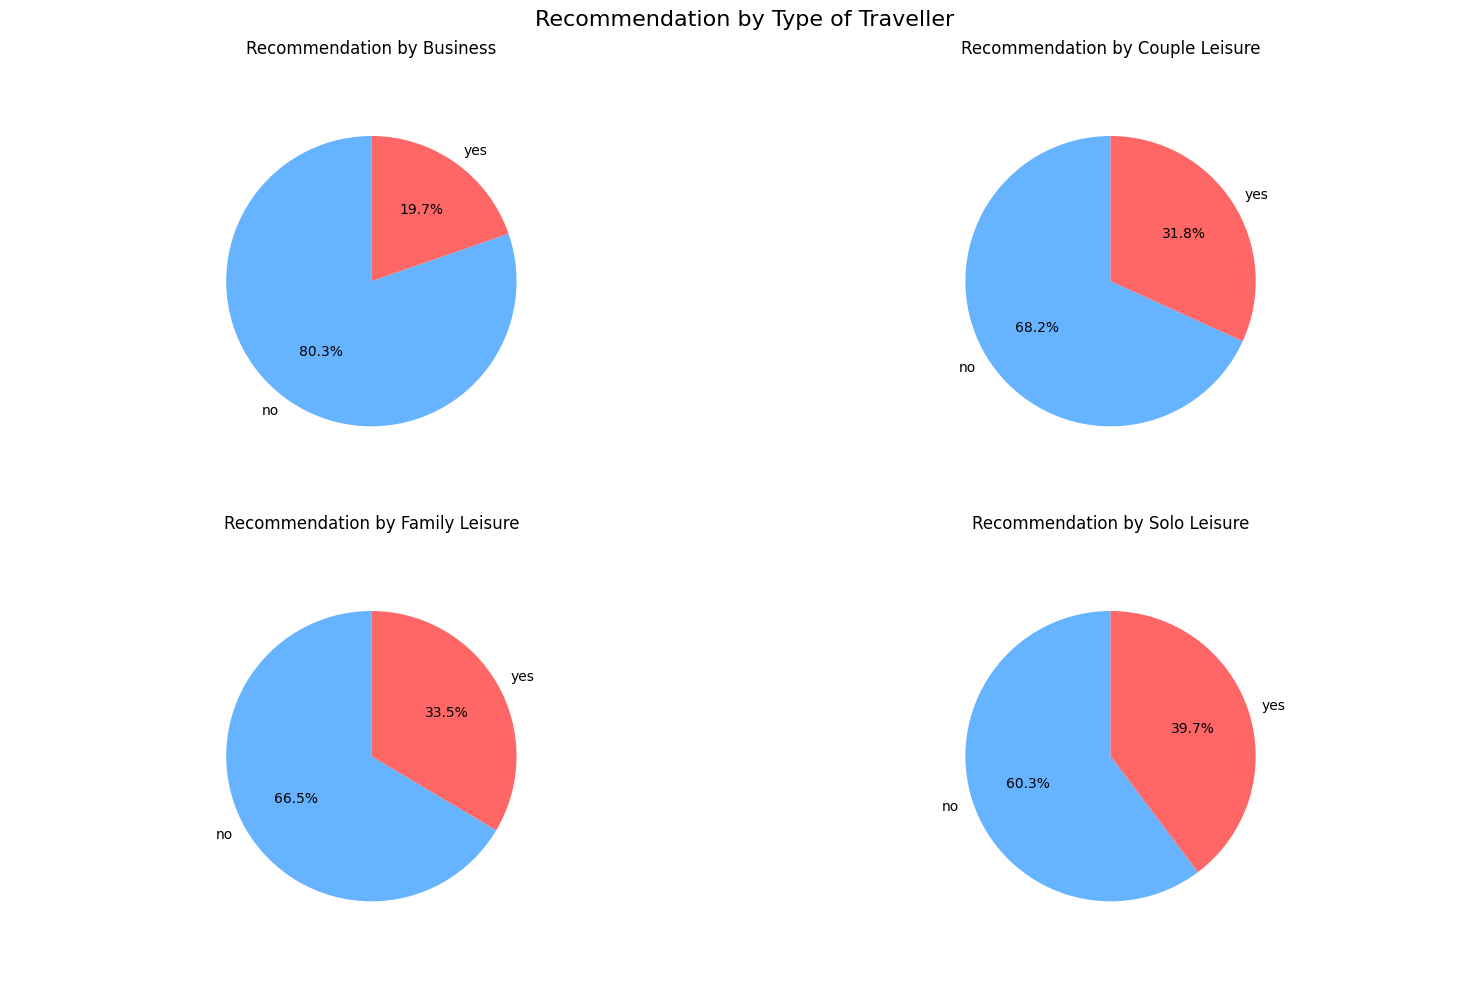

In [8]:
# --- Figure 2: Recommendation by Type of Traveller ---
# Create a new figure for the traveller types
# Print the recommendation analysis by type of traveller
print("\nRecommendation by Type of Traveller:")
print(recommendation_by_travel)

num_travel_types = len(recommendation_by_travel.index)
num_cols = 2  # Set the number of columns for traveller types
num_rows = (num_travel_types // num_cols) + (num_travel_types % num_cols > 0)  # Compute rows needed

# Create the subplots layout (rows, columns) for the second figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array to iterate easily
axes = axes.flatten()
# Add a title above all subplots
fig.suptitle("Recommendation by Type of Traveller", fontsize=16)
# Loop through each traveller type and plot its pie chart
for i, traveller_type in enumerate(recommendation_by_travel.index):
    sizes = recommendation_by_travel.loc[traveller_type]
    axes[i].pie(sizes, labels=sizes.index, colors=['#66b3ff', '#ff6666'], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Recommendation by {traveller_type}')
    axes[i].axis('equal')

# Hide unused axes if any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap
# Add extra space around the plot edges
plt.subplots_adjust(left=0.05, right=0.95, top=2, bottom=0.15)  # Increased space at top and bottom
plt.tight_layout()

# Display the second figure
plt.show()

Average Overall Rating by Year and month:
Year-Month
2015-05     8.000000
2015-10     2.000000
2015-12     3.000000
2016-01     1.500000
2016-02     8.000000
2016-03     6.722222
2016-04     4.904762
2016-05     5.120000
2016-06     4.000000
2016-07     4.470588
2016-08     3.843750
2016-09     3.914286
2016-10     4.540541
2016-11     4.435897
2016-12     3.760870
2017-01     4.050847
2017-02     4.365385
2017-03     3.571429
2017-04     3.784615
2017-05     4.063830
2017-06     2.910714
2017-07     3.641026
2017-08     3.738095
2017-09     4.727273
2017-10     3.795455
2017-11     4.315789
2017-12     3.208333
2018-01     5.333333
2018-02     3.814815
2018-03     4.514286
2018-04     4.360000
2018-05     4.289474
2018-06     4.741935
2018-07     4.451613
2018-08     5.500000
2018-09     4.913043
2018-10     4.333333
2018-11     3.964286
2018-12     4.322581
2019-01     4.619048
2019-02     4.041667
2019-03     4.636364
2019-04     4.772727
2019-05     5.212121
2019-06     5.423077
20

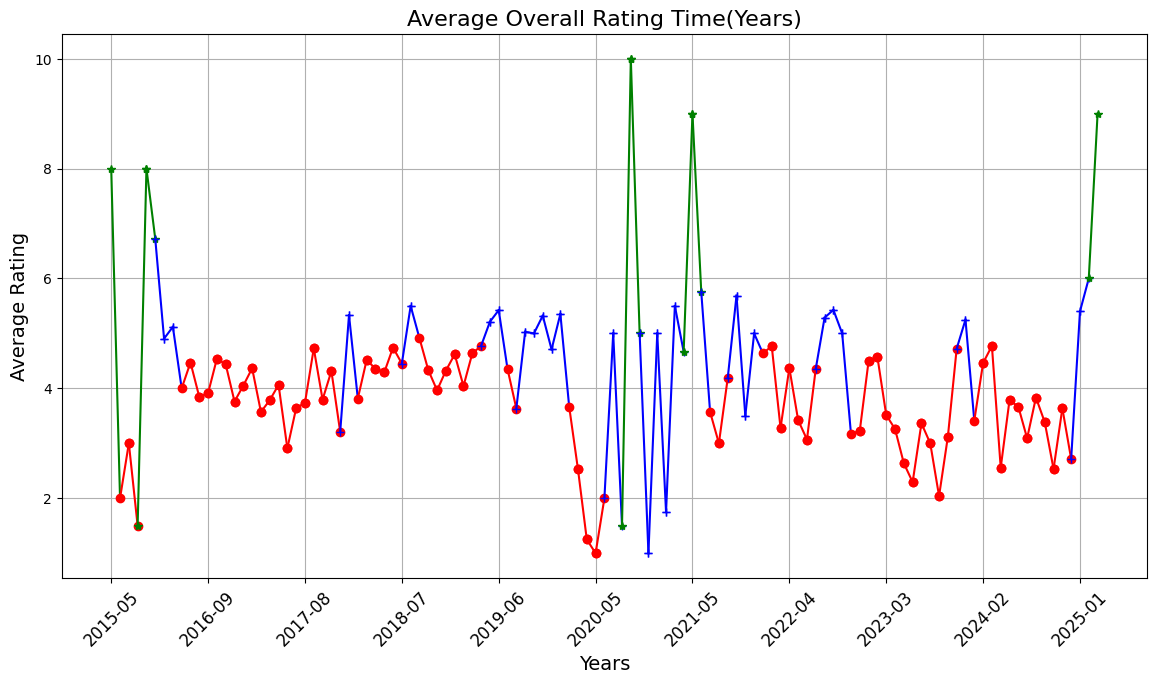

In [9]:
# 4.Ratings Trends Over Time (Date Flown): A line plot to show how the ratings vary over different months/years.
# Convert 'Date Flown' column to datetime (infer the format automatically)
df['Date Flown'] = pd.to_datetime(df['Date Flown'], errors='coerce')

# Extract year and month from the 'Date Flown' column
df['Year-Month'] = df['Date Flown'].dt.to_period('M')

# Group by Year-Month and calculate average rating
avg_rating_per_month = df.groupby('Year-Month')['Overall Rating'].mean()

# --- Plot: Average Rating by Month with Conditional Line Colors ---
plt.figure(figsize=(14, 8))  # Increased figure size

# Convert the PeriodIndex to a list of strings for plotting
months = avg_rating_per_month.index.astype(str)

# Loop through the average ratings and plot them with different colors based on the rating
for i in range(1, len(avg_rating_per_month)):
    x = [months[i - 1], months[i]]  # Use string months for x-axis
    y = [avg_rating_per_month.iloc[i - 1], avg_rating_per_month.iloc[i]]

    # Define the color based on the rating
    if max(y) < 5:  # Both ratings are below 5
        plt.plot(x, y, color='red', marker='o')
    elif 5 <= max(y) <= 7:  # Both ratings are between 5 and 7
        plt.plot(x, y, color='blue', marker='+')
    else:  # Both ratings are above 7
        plt.plot(x, y, color='green', marker='*')

print("Average Overall Rating by Year and month:")
print(avg_rating_per_month)
print("\n")

# Add title and labels
plt.title('Average Overall Rating Time(Years)', fontsize=16)  # Larger title font
plt.xlabel('Years', fontsize=14)  # Larger x-axis label
plt.ylabel('Average Rating', fontsize=14)  # Larger y-axis label

# Adjust x-axis labels for better readability and scale
plt.xticks(rotation=45, fontsize=12)  # Increased font size for x-axis labels

# Adjust x-axis limits to spread out the months more clearly
plt.xticks(range(0, len(months), max(1, len(months)//10)), months[::max(1, len(months)//10)], fontsize=12)

plt.grid(True)
# Adjust plot layout to add space around the x-axis
plt.subplots_adjust(bottom=0.2)  # Add space near x-axis
plt.grid(True)
plt.show()


Average Ratings for each Rating Factor by Year:

Average Seat Comfort Rating by Year:
Date Flown
2015    3.000000
2016    2.848993
2017    2.525939
2018    2.732938
2019    2.791667
2020    2.691489
2021    2.717391
2022    2.674419
2023    2.416667
2024    2.577381
2025    3.545455
Name: Seat Comfort Rating, dtype: float64

Average Staff Service Rating by Year:
Date Flown
2015    3.000000
2016    3.194631
2017    2.822898
2018    3.148368
2019    3.351190
2020    3.510638
2021    3.358696
2022    3.223256
2023    3.061594
2024    3.000000
2025    3.090909
Name: Staff Service Rating, dtype: float64

Average Food & Beverages Rating by Year:
Date Flown
2015    2.000000
2016    2.362416
2017    1.966011
2018    2.415430
2019    2.502976
2020    2.212766
2021    2.402174
2022    2.316279
2023    2.112319
2024    2.136905
2025    2.818182
Name: Food & Beverages Rating, dtype: float64

Average Inflight Entertainment Rating by Year:
Date Flown
2015    1.666667
2016    2.184564
2017    1.83184

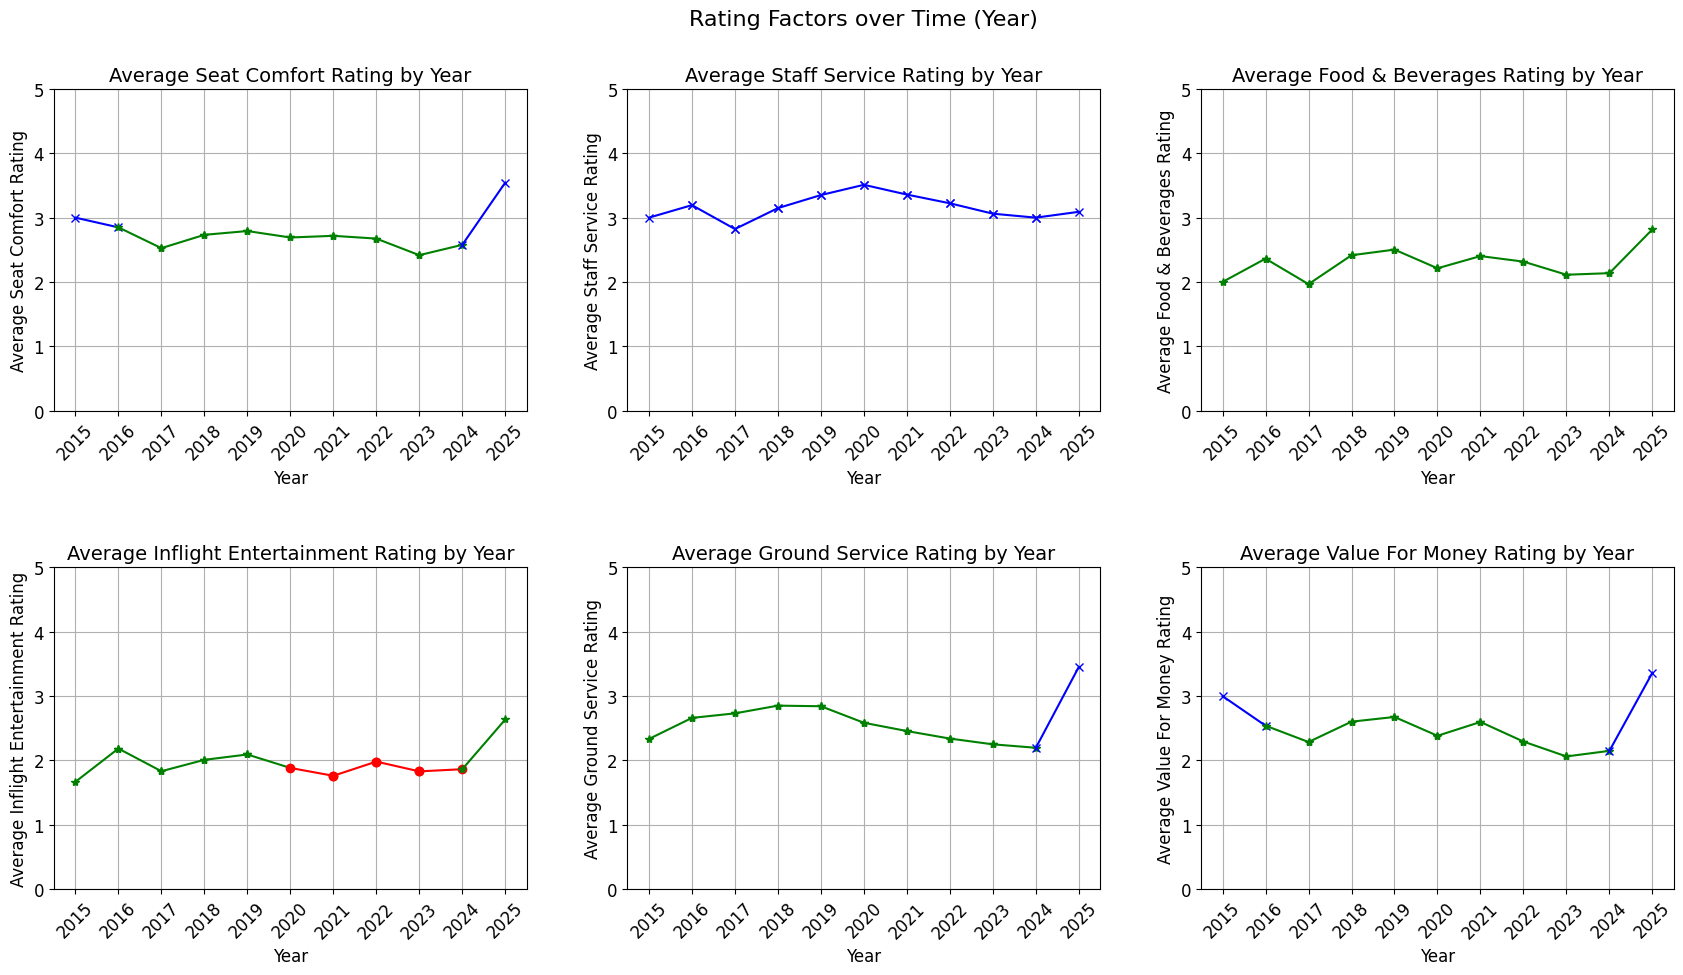

In [10]:

# List of rating columns
rating_columns = [
    'Seat Comfort Rating', 'Staff Service Rating', 'Food & Beverages Rating',
    'Inflight Entertainment Rating', 'Ground Service Rating', 'Value For Money Rating'
]

# Create the subplot layout (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # Increased figure size

# Flatten the axes array to iterate easily
axes = axes.flatten()

# Plotting for each rating column
for i, rating_col in enumerate(rating_columns):
    # Group by Year and calculate average rating, ignoring NaNs
    avg_rating_per_year = df.groupby(df['Date Flown'].dt.year)[rating_col].mean()

    # Convert the index (years) to a list of strings for plotting
    years = avg_rating_per_year.index.astype(str)

    # Loop through the average ratings and plot them with different colors based on the rating
    for j in range(1, len(avg_rating_per_year)):
        x = [years[j - 1], years[j]]  # Use years for x-axis
        y = [avg_rating_per_year.iloc[j - 1], avg_rating_per_year.iloc[j]]

        # Define the color based on the rating range
        if 1 <= max(y) <= 2:  # Between 1 and 2 (red)
            axes[i].plot(x, y, color='red', marker='o')
        elif 2 <= max(y) < 3:  # Between 2 and 3 (green)
            axes[i].plot(x, y, color='green', marker='*')
        elif 3 <= max(y) <= 5:  # Between 3 and 5 (blue)
            axes[i].plot(x, y, color='blue', marker='x')

    # Add title and labels
    axes[i].set_title(f'Average {rating_col} by Year', fontsize=14)  # Larger font size
    axes[i].set_xlabel('Year', fontsize=12)  # Label with larger font
    axes[i].set_ylabel(f'Average {rating_col}', fontsize=12)  # Label with larger font

    # Set y-axis limit from 0 to 5 for all subplots
    axes[i].set_ylim(0, 5)

    # Adjust x-axis labels for better readability and consistency
    axes[i].tick_params(axis='x', rotation=45, labelsize=12)  # Larger font size for x-axis labels
    axes[i].tick_params(axis='y', labelsize=12)  # Larger font size for y-axis labels
    axes[i].grid(True)

print("Average Ratings for each Rating Factor by Year:")
for rating_col in rating_columns:
    avg_rating_per_year = df.groupby(df['Date Flown'].dt.year)[rating_col].mean()
    print(f"\nAverage {rating_col} by Year:")
    print(avg_rating_per_year)

# Adjust layout to prevent overlap and add space around the edges
plt.tight_layout(pad=4.0)  # Increase padding between subplots
fig.suptitle("Rating Factors over Time (Year)", fontsize=16)  # Larger title for the whole figure

# Adjust x-axis limits to spread out the years more clearly
plt.xticks(range(0, len(years), max(1, len(years)//10)), years[::max(1, len(years)//10)], fontsize=12)

# Add extra space around the plot edges
plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1)

# Show the plot
plt.show()

